In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# matches = pd.read_csv('match_metadata.csv')
train = pd.read_csv('train.csv')
# output = pd.read_csv('val_given.csv')

In [43]:
def frequency_plot(attribute, sortByIndex = True):
    type_counts = train[attribute].value_counts()
    if sortByIndex:
        type_counts = type_counts.sort_index()
    else:
        type_counts = type_counts.sort_values()
    print(type_counts)
    plt.figure(figsize=(10, 6))
    type_counts.plot(kind='bar')
    plt.grid(axis='y')
    plt.xlabel(attribute)
    plt.ylabel('count')
    plt.title(f'Frequency of {attribute}')
    plt.xticks(rotation=45)
    plt.show()

long service       648
drive              932
short service     1620
push/rush         2011
clear             3078
drop              3182
smash             3682
defensive shot    4087
lob               5207
net shot          5725
Name: type, dtype: int64


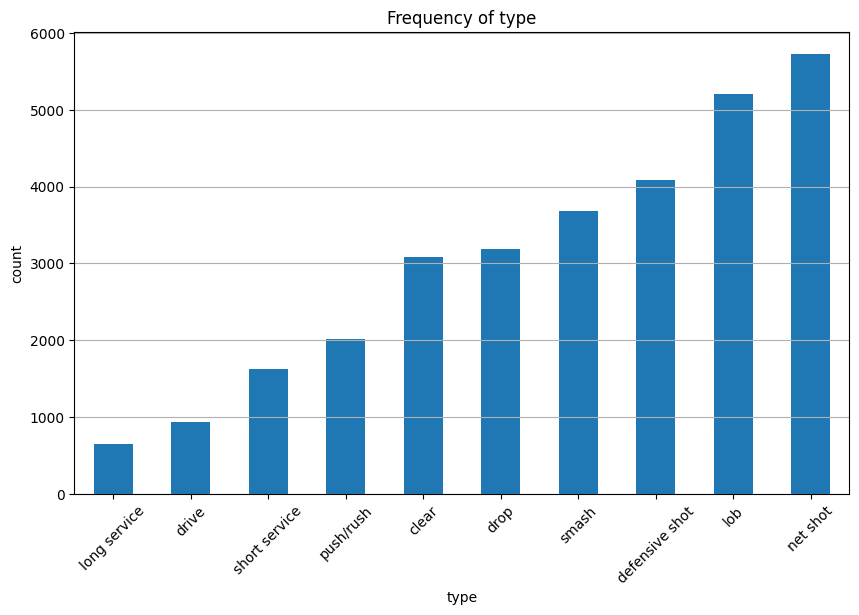

In [144]:
# Assuming 'Type' is the column containing the different types in your DataFrame
for i in ['type']:
    frequency_plot(i, False)

['clear', 'defensive shot', 'drive', 'drop', 'lob', 'long service', 'net shot', 'push/rush', 'short service', 'smash']
[[0, 0, 0, 0, 0.3333333333333333, 0, 0.3333333333333333, 0.3333333333333333, 0, 0], [0, 0, 0, 0, 0.07142857142857142, 0, 0.21428571428571427, 0.7142857142857143, 0, 0], [0, 0, 0, 0, 0.7225130890052356, 0, 0.20418848167539266, 0.07329842931937172, 0, 0], [0.0013192612137203166, 0.002638522427440633, 0.002638522427440633, 0, 0.525065963060686, 0, 0.370712401055409, 0.09762532981530343, 0, 0], [0, 0.25, 0, 0, 0.25, 0, 0.25, 0.25, 0, 0], [0, 0.125, 0, 0, 0.25, 0, 0, 0.625, 0, 0], [0, 0, 0, 0, 0.17391304347826086, 0, 0.41304347826086957, 0.391304347826087, 0, 0.021739130434782608], [0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0], [0, 0, 0, 0.005714285714285714, 0.6742857142857143, 0, 0.2571428571428571, 0.06285714285714286, 0, 0], [0, 0, 0.00129366106080207, 0, 0.5316946959896507, 0, 0.35963777490297544, 0.1073738680465718, 0, 0], [0, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0], [0, 0, 0, 0, 0, 0, 0, 

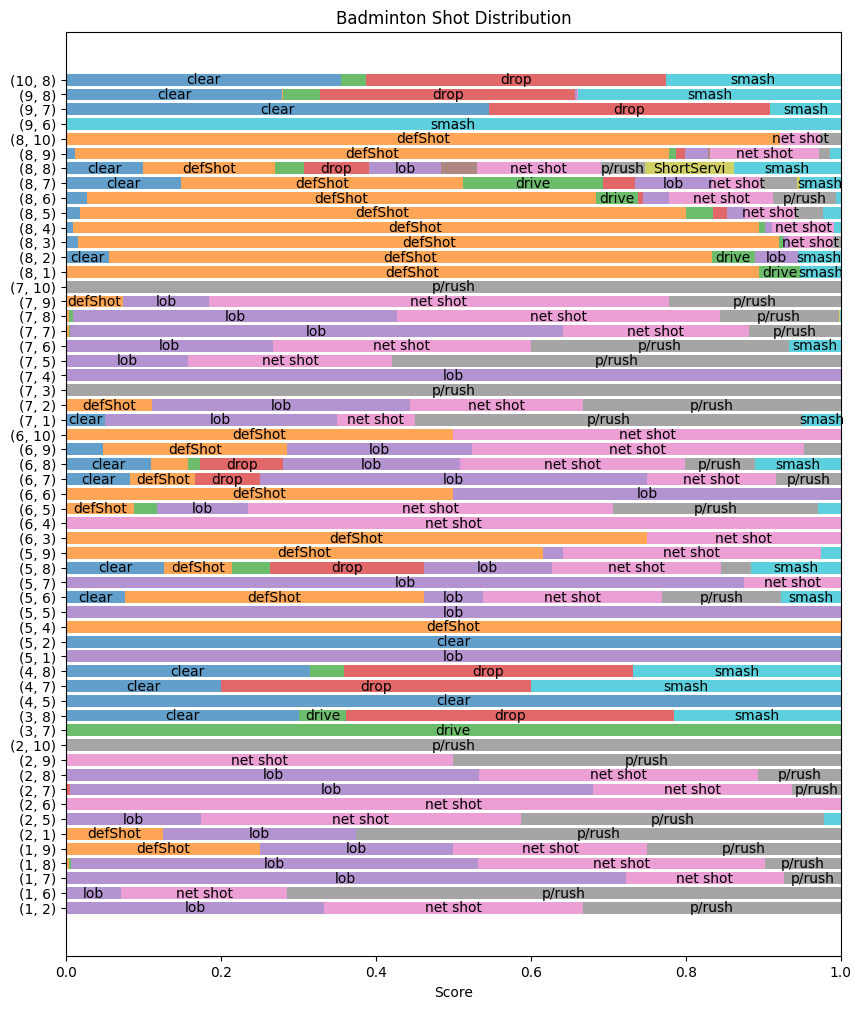

In [142]:
def typeAttr():
    actions = ['clear', 'defensive shot', 'drive', 'drop', 'lob', 'long service', 'net shot', 'push/rush', 'short service', 'smash']
    short_actions = ['clear', 'defShot', 'drive', 'drop', 'lob', 'longServi', 'net shot', 'p/rush', 'ShortServi', 'smash']
    table = {}
    for i in range(len(train)):
        pair = (train['player_location_area'][i], train['opponent_location_area'][i])
        if pair not in table:
            table[pair] = {}
        if train['type'][i] not in table[pair]:
            table[pair][train['type'][i]] = 0
        table[pair][train['type'][i]] += 1
    for k, i in table.items():
        s = 0
        for j in table[k]:
            s += table[k][j]
        for j in actions:
            if j not in table[k]:
                table[k][j] = 0
            else:
                table[k][j] /= s
        # print(table[k].items())
        # table[k] = sorted(table[k].items())
        # print(type(table[k]))
    data = sorted(table.items())
    # print(type(table))
    # print(data)
    scores = []
    labels = []
    for item in data:
        x = sorted(item[1].items())
        # print(x)
        # print(item[1])
        score = []
        for j in range(0, len(x)):
            score.append(x[j][1])
        scores.append(score)
    print(actions)
    print(scores)
    fig, ax = plt.subplots(figsize=(10, 12))
    y_pos = range(len(data))

    for i, score in enumerate(scores):
        left = 0
        for j, s in enumerate(score):
            ax.barh(y_pos[i], s, left=left, align='center', alpha=0.7)
            left += s
            if s < 0.05:
                continue
            ax.text(left - s / 2, y_pos[i], short_actions[j], ha='center', va='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels([item[0] for item in data])
    ax.set_xlabel('Score')
    ax.set_title('Badminton Shot Distribution')

    plt.show()
typeAttr()
